## Libraries

In [1]:
import pandas as pd
import numpy as np
from random import random
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.__version__

'2.9.0'

## Train/val/pred split

In [3]:
def import_datasets():
            
    # import training and prediction datasets
    train_dataset = pd.read_csv(r'./trainpred_dataset/FIA1_20142022_train_dataset.csv')
    pred_dataset = pd.read_csv(r'./trainpred_dataset/FIA1_20142022_pred_dataset.csv')
    train_dataset["period"] = train_dataset["period"].astype(int)
    
    windows = train_dataset["window"].unique()
    
    # list with portfolios
    pred_port_list = pred_dataset[pred_dataset["window"] == 0].iloc[:,:4].values.tolist()
    
    train_win_list = []
    pred_win_list = []
    
    # split datasets by windows
    for w in windows:
        
        train = train_dataset[train_dataset["window"] == w]
        pred = pred_dataset[pred_dataset["window"] == w]
        
        # drop funds columns
        train_prev = train.drop(train.columns[:4], axis=1).reset_index(drop=True)
        pred_prev = pred.drop(pred.columns[:4], axis=1).reset_index(drop=True)
        
        train_win_list.append(train_prev)
        pred_win_list.append(pred_prev)
        
    
    return train_win_list, pred_win_list, pred_port_list


In [4]:
def train_val_pred_split():
    
    train_sets, pred_sets, pred_port_list = import_datasets()
    
    # splits the training dataset in training and validation sets
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
    
    dic_train = {}
    dic_val = {}
    dic_pred = {}
    
    # stratified split per periods
    for w, train_set in enumerate(train_sets):
        for train_index, val_index in split.split(train_set, train_set["period"]):
            strat_train_set = train_set.loc[train_index]
            strat_val_set = train_set.loc[val_index]
            
            X_train = strat_train_set.drop(strat_train_set.columns[-6:], axis=1)
            y_train = strat_train_set.loc[:, ["w_F1", "w_F2","w_F3","w_F4"]]
            
            X_val = strat_val_set.drop(strat_val_set.columns[-6:], axis=1)
            y_val = strat_val_set.loc[:, ["w_F1", "w_F2","w_F3","w_F4"]]
            
            X_pred = pred_sets[w].drop(pred_sets[w].columns[-6:], axis=1)
            
            dic_train[w] = [X_train, y_train]
            dic_val[w] = [X_val, y_val]
            dic_pred[w] = X_pred


    return dic_train, dic_val, dic_pred, pred_port_list

In [5]:
# get all datasets and portfolios list
dic_train, dic_val, dic_pred, pred_port_list = train_val_pred_split()


In [6]:
# 2° window training inputs (2016 to 2021)
dic_train[2][0]

,ret_F1,ret_F2,ret_F3,ret_F4,rsk_F1,rsk_F2,rsk_F3,rsk_F4,CORR_F1F2,CORR_F1F3,CORR_F1F4,CORR_F2F3,CORR_F2F4,CORR_F3F4
66083,0.171939,0.270738,0.394526,0.273058,0.143839,0.196426,0.141295,0.129794,0.827951,0.729154,0.692460,0.773838,0.716855,0.712572
39709,0.475044,0.489305,0.311326,0.251790,0.384417,0.194289,0.192601,0.198278,0.727292,0.766216,0.756955,0.838467,0.819654,0.928007
88178,0.363362,0.257881,0.375526,0.381995,0.179756,0.181495,0.213341,0.145330,0.894073,0.736210,0.818167,0.736360,0.862172,0.696347
29905,0.200433,0.320284,0.381995,0.310304,0.137747,0.178042,0.182803,0.221800,0.919326,0.892861,0.796780,0.949429,0.868108,0.906294
68162,0.245617,0.489305,0.212685,0.175012,0.182380,0.194289,0.129613,0.143440,0.847846,0.897266,0.920668,0.805347,0.812089,0.927220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92959,0.294656,0.257881,0.318545,0.314083,0.195730,0.181495,0.144882,0.159112,0.902889,0.898130,0.898642,0.903643,0.877912,0.904116
75337,0.318315,0.244021,0.314083,0.230774,0.312862,0.194807,0.159112,0.205234,0.767546,0.774393,0.779156,0.882857,0.817841,0.827642
2418,1.080724,0.433474,0.168252,0.611184,0.400353,0.155556,0.196828,0.132727,0.616322,0.587333,0.560948,0.734766,0.638158,0.615747
85916,0.261629,0.263809,0.240980,0.218185,0.166025,0.147950,0.183468,0.166329,0.939175,0.949920,0.943013,0.922402,0.903907,0.955173


In [7]:
# 2° window training targets (2016 to 2021)
dic_train[2][1]

,w_F1,w_F2,w_F3,w_F4
66083,0.03668,0.00000,0.74776,0.21556
39709,0.00000,0.54199,0.45801,0.00000
88178,0.09760,0.00000,0.90240,0.00000
29905,0.40062,0.00000,0.00000,0.59938
68162,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...
92959,1.00000,0.00000,0.00000,0.00000
75337,0.00000,0.00000,0.00000,1.00000
2418,0.00000,0.00000,0.01841,0.98159
85916,0.00000,1.00000,0.00000,0.00000


In [8]:
# 2° window validation inputs (2016 to 2021)
dic_val[2][0]

,ret_F1,ret_F2,ret_F3,ret_F4,rsk_F1,rsk_F2,rsk_F3,rsk_F4,CORR_F1F2,CORR_F1F3,CORR_F1F4,CORR_F2F3,CORR_F2F4,CORR_F3F4
27010,0.303668,0.271785,0.381995,0.406781,0.153158,0.183402,0.182803,0.195840,0.937055,0.951249,0.914703,0.956369,0.929685,0.945771
2257,1.080724,0.433474,0.200433,0.310304,0.400353,0.155556,0.137747,0.221800,0.616322,0.638677,0.626298,0.745024,0.749633,0.796780
87926,0.363362,0.294656,0.334630,0.325760,0.179756,0.195730,0.188213,0.154691,0.883020,0.911491,0.882312,0.942374,0.906812,0.925820
12275,0.169064,0.246350,0.433474,0.320284,0.153151,0.123095,0.155556,0.178042,0.768981,0.768350,0.879922,0.756725,0.884654,0.791458
63921,0.237258,0.489305,0.293444,0.253873,0.147235,0.194289,0.219392,0.201845,0.830951,0.844052,0.890913,0.854635,0.836828,0.897772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67535,0.270738,0.222538,0.251790,0.210456,0.196426,0.152728,0.198278,0.184630,0.876043,0.867968,0.897305,0.898244,0.923962,0.936867
34646,0.326419,0.173203,0.611184,0.381995,0.168608,0.068897,0.132727,0.182803,0.545960,0.663229,0.928713,0.353593,0.519026,0.700075
104149,0.240980,0.375526,0.314083,0.218185,0.183468,0.213341,0.159112,0.166329,0.735838,0.919913,0.955173,0.695143,0.708400,0.906779
91972,0.367576,0.240980,0.342705,0.218185,0.192908,0.183468,0.191335,0.166329,0.912317,0.803734,0.875501,0.851291,0.955173,0.835866


In [9]:
print(pred_port_list[:5])
print(len(pred_port_list))

[['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'Atlas One FIC FIA'], ['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'Atmos Ações FIC FIA'], ['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'AZ Quest Small Mid Caps FIC FIA'], ['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'Bahia AM Smid Caps Valor FIC FIA'], ['Alaska Black FIC FIA BDR Nível I', 'Apex Ações 30 FIC FIA', 'ARX Income FIC FIA', 'BNP Paribas Small Caps FIA']]
35960


## Inputs scaler

In [10]:
# scaling training, validation as prediction inputs
minmax_scaler = MinMaxScaler()

dic_train_prep = {}
dic_val_prep = {}
dic_pred_prep = {}

for w in dic_train.keys():
    
    X_train_prepared = minmax_scaler.fit_transform(dic_train[w][0])
    X_val_prepared = minmax_scaler.transform(dic_val[w][0])
    X_pred_prepared = minmax_scaler.transform(dic_pred[w])

    dic_train_prep[w] = [X_train_prepared, dic_train[w][1].values]
    dic_val_prep[w] = [X_val_prepared, dic_val[w][1].values]
    dic_pred_prep[w] = [X_pred_prepared, None]


In [11]:
# 2° window scaled training inputs janela (2016 a 2021)
dic_train_prep[2][0]

array([[0.19707415, 0.34700268, 0.48046341, ..., 0.68545949, 0.59251392,
        0.59050215],
       [0.46487261, 0.58264722, 0.39076242, ..., 0.79087588, 0.76019014,
        0.94488175],
       [0.36619927, 0.33314106, 0.45997805, ..., 0.62432819, 0.82954028,
        0.56381236],
       ...,
       [1.        , 0.52245407, 0.23650929, ..., 0.6217295 , 0.46415285,
        0.43122956],
       [0.27631706, 0.33953279, 0.31492   , ..., 0.92778146, 0.89761452,
        0.98956781],
       [0.26217025, 0.46459102, 0.31370778, ..., 0.88123395, 0.83479804,
        0.92420606]])

## Train the model

In [12]:
def NN_model():
    
    # build Neural Networks model and architeture: 14 (inputs) -> 3 x 20 layers -> 4 (outputs)
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape = (dic_train_prep[0][0].shape[1],)))
    model.add(tf.keras.layers.Dense(20, activation = "relu"))
    model.add(tf.keras.layers.Dense(20, activation = "relu"))
    model.add(tf.keras.layers.Dense(20, activation = "relu"))
    model.add(tf.keras.layers.Dense(4, activation = "softmax"))
    
    # compile the model
    opt = tf.keras.optimizers.Adam()
    # opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
    model.compile(optimizer = opt, loss = "mse")
    
    return model


In [13]:
dict_train_history = {}
dict_val_history = {}

# train Neural Networks
for w in dic_train_prep.keys():
    
    print("\nTraining window: ", w)
    
    model = NN_model()
    
    history = model.fit(dic_train_prep[w][0],
                        dic_train_prep[w][1],
                        epochs = 600,
                        batch_size=32,
                        validation_data = (dic_val_prep[w][0], dic_val_prep[w][1])
                       )
    
    dic_pred_prep[w][1] = model.predict(dic_pred_prep[w][0])
    
    dict_train_history[w] = [history.epoch, history.history["loss"]]
    dict_val_history[w] = [history.epoch, history.history["val_loss"]]
    


Training window:  0
Epoch 1/600
3035/3035 [==============================] - 11s 3ms/step - loss: 0.1216 - val_loss: 0.1097
Epoch 2/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.1065 - val_loss: 0.1013
Epoch 3/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.1007 - val_loss: 0.0968
Epoch 4/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0963 - val_loss: 0.0930
Epoch 5/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0920 - val_loss: 0.0896
Epoch 6/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0888 - val_loss: 0.0870
Epoch 7/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0864 - val_loss: 0.0859
Epoch 8/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0844 - val_loss: 0.0823
Epoch 9/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0829 - val_loss: 0.0852
Epoch 10/600
3035/3035 [==========================

3035/3035 [==============================] - 12s 4ms/step - loss: 0.0595 - val_loss: 0.0615
Epoch 80/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0595 - val_loss: 0.0590
Epoch 81/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0593 - val_loss: 0.0597
Epoch 82/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0592 - val_loss: 0.0583
Epoch 83/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0591 - val_loss: 0.0610
Epoch 84/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0591 - val_loss: 0.0622
Epoch 85/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0588 - val_loss: 0.0584
Epoch 86/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0586 - val_loss: 0.0585
Epoch 87/600
3035/3035 [==============================] - 11s 4ms/step - loss: 0.0586 - val_loss: 0.0594
Epoch 88/600
3035/3035 [==============================] - 10s 3ms/st

3035/3035 [==============================] - 9s 3ms/step - loss: 0.0543 - val_loss: 0.0561
Epoch 157/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0542 - val_loss: 0.0542
Epoch 158/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0543 - val_loss: 0.0547
Epoch 159/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0540 - val_loss: 0.0593
Epoch 160/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0541 - val_loss: 0.0566
Epoch 161/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0540 - val_loss: 0.0565
Epoch 162/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0540 - val_loss: 0.0552
Epoch 163/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0539 - val_loss: 0.0533
Epoch 164/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0539 - val_loss: 0.0536
Epoch 165/600
3035/3035 [==============================] - 7s 2ms

3035/3035 [==============================] - 7s 2ms/step - loss: 0.0497 - val_loss: 0.0539
Epoch 235/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0496 - val_loss: 0.0505
Epoch 236/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0495 - val_loss: 0.0482
Epoch 237/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0494 - val_loss: 0.0501
Epoch 238/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0493 - val_loss: 0.0497
Epoch 239/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0493 - val_loss: 0.0538
Epoch 240/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0493 - val_loss: 0.0502
Epoch 241/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0491 - val_loss: 0.0483
Epoch 242/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0491 - val_loss: 0.0487
Epoch 243/600
3035/3035 [==============================] - 7s 2ms/ste

3035/3035 [==============================] - 6s 2ms/step - loss: 0.0466 - val_loss: 0.0459
Epoch 313/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0465 - val_loss: 0.0458
Epoch 314/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0464 - val_loss: 0.0461
Epoch 315/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0464 - val_loss: 0.0458
Epoch 316/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0465 - val_loss: 0.0463
Epoch 317/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0463 - val_loss: 0.0463
Epoch 318/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0463 - val_loss: 0.0452
Epoch 319/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0463 - val_loss: 0.0460
Epoch 320/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0463 - val_loss: 0.0459
Epoch 321/600
3035/3035 [==============================] - 6s 2ms/ste

3035/3035 [==============================] - 7s 2ms/step - loss: 0.0439 - val_loss: 0.0449
Epoch 391/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0437 - val_loss: 0.0461
Epoch 392/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0440 - val_loss: 0.0433
Epoch 393/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0438 - val_loss: 0.0444
Epoch 394/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0438 - val_loss: 0.0448
Epoch 395/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0437 - val_loss: 0.0430
Epoch 396/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0436 - val_loss: 0.0433
Epoch 397/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0436 - val_loss: 0.0417
Epoch 398/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0436 - val_loss: 0.0442
Epoch 399/600
3035/3035 [==============================] - 6s 2ms/ste

3035/3035 [==============================] - 7s 2ms/step - loss: 0.0418 - val_loss: 0.0445
Epoch 469/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0418 - val_loss: 0.0417
Epoch 470/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0417 - val_loss: 0.0418
Epoch 471/600
3035/3035 [==============================] - 7s 2ms/step - loss: 0.0417 - val_loss: 0.0407
Epoch 472/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0417 - val_loss: 0.0431
Epoch 473/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0417 - val_loss: 0.0412
Epoch 474/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0414 - val_loss: 0.0414
Epoch 475/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0417 - val_loss: 0.0410
Epoch 476/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0415 - val_loss: 0.0414
Epoch 477/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0390 - val_loss: 0.0380
Epoch 547/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0388 - val_loss: 0.0390
Epoch 548/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0388 - val_loss: 0.0388
Epoch 549/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0389 - val_loss: 0.0391
Epoch 550/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0388 - val_loss: 0.0383
Epoch 551/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0388 - val_loss: 0.0388
Epoch 552/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0389 - val_loss: 0.0405
Epoch 553/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0388 - val_loss: 0.0373
Epoch 554/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0390 - val_loss: 0.0394
Epoch 555/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0863 - val_loss: 0.0864
Epoch 24/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0859 - val_loss: 0.0868
Epoch 25/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0856 - val_loss: 0.0879
Epoch 26/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0852 - val_loss: 0.0878
Epoch 27/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0848 - val_loss: 0.0858
Epoch 28/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0845 - val_loss: 0.0851
Epoch 29/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0842 - val_loss: 0.0835
Epoch 30/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0837 - val_loss: 0.0849
Epoch 31/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0833 - val_loss: 0.0846
Epoch 32/600
3035/3035 [==============================] - 5s 2ms/step - loss:

Epoch 102/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0693 - val_loss: 0.0713
Epoch 103/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0691 - val_loss: 0.0725
Epoch 104/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0691 - val_loss: 0.0694
Epoch 105/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0688 - val_loss: 0.0718
Epoch 106/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0686 - val_loss: 0.0695
Epoch 107/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0685 - val_loss: 0.0704
Epoch 108/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0686 - val_loss: 0.0693
Epoch 109/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0682 - val_loss: 0.0724
Epoch 110/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0682 - val_loss: 0.0683
Epoch 111/600
3035/3035 [==============================

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0608 - val_loss: 0.0632
Epoch 181/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0608 - val_loss: 0.0611
Epoch 182/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0609 - val_loss: 0.0611
Epoch 183/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0607 - val_loss: 0.0636
Epoch 184/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0605 - val_loss: 0.0609
Epoch 185/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0605 - val_loss: 0.0622
Epoch 186/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0604 - val_loss: 0.0626
Epoch 187/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0603 - val_loss: 0.0613
Epoch 188/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0603 - val_loss: 0.0607
Epoch 189/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 6s 2ms/step - loss: 0.0562 - val_loss: 0.0571
Epoch 259/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0562 - val_loss: 0.0558
Epoch 260/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0559 - val_loss: 0.0556
Epoch 261/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0559 - val_loss: 0.0586
Epoch 262/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0559 - val_loss: 0.0554
Epoch 263/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0560 - val_loss: 0.0590
Epoch 264/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0560 - val_loss: 0.0588
Epoch 265/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0559 - val_loss: 0.0561
Epoch 266/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0559 - val_loss: 0.0558
Epoch 267/600
3035/3035 [==============================] - 6s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0532 - val_loss: 0.0536
Epoch 337/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0532 - val_loss: 0.0544
Epoch 338/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0531 - val_loss: 0.0562
Epoch 339/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0530 - val_loss: 0.0555
Epoch 340/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0531 - val_loss: 0.0541
Epoch 341/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0531 - val_loss: 0.0551
Epoch 342/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0531 - val_loss: 0.0524
Epoch 343/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0528 - val_loss: 0.0545
Epoch 344/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0531 - val_loss: 0.0538
Epoch 345/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0513 - val_loss: 0.0524
Epoch 415/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0512 - val_loss: 0.0527
Epoch 416/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0511 - val_loss: 0.0525
Epoch 417/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0511 - val_loss: 0.0524
Epoch 418/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0512 - val_loss: 0.0539
Epoch 419/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0511 - val_loss: 0.0524
Epoch 420/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0512 - val_loss: 0.0528
Epoch 421/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0510 - val_loss: 0.0564
Epoch 422/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0510 - val_loss: 0.0508
Epoch 423/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0494 - val_loss: 0.0500
Epoch 493/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0495 - val_loss: 0.0503
Epoch 494/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0496 - val_loss: 0.0523
Epoch 495/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0494 - val_loss: 0.0496
Epoch 496/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0493 - val_loss: 0.0494
Epoch 497/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0494 - val_loss: 0.0522
Epoch 498/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0494 - val_loss: 0.0496
Epoch 499/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0495 - val_loss: 0.0553
Epoch 500/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0491 - val_loss: 0.0513
Epoch 501/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0484 - val_loss: 0.0483
Epoch 571/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0484 - val_loss: 0.0482
Epoch 572/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0483 - val_loss: 0.0484
Epoch 573/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0483 - val_loss: 0.0510
Epoch 574/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0483 - val_loss: 0.0485
Epoch 575/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0482 - val_loss: 0.0483
Epoch 576/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0482 - val_loss: 0.0482
Epoch 577/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0483 - val_loss: 0.0486
Epoch 578/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0484 - val_loss: 0.0504
Epoch 579/600
3035/3035 [==============================] - 5s 2ms/ste

Epoch 48/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0916 - val_loss: 0.0911
Epoch 49/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0912 - val_loss: 0.0918
Epoch 50/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0909 - val_loss: 0.0903
Epoch 51/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0908 - val_loss: 0.0933
Epoch 52/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0903 - val_loss: 0.0918
Epoch 53/600
3035/3035 [==============================] - 14s 4ms/step - loss: 0.0902 - val_loss: 0.0914
Epoch 54/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0899 - val_loss: 0.0898
Epoch 55/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0897 - val_loss: 0.0908
Epoch 56/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0895 - val_loss: 0.0906
Epoch 57/600
3035/3035 [==============================] - 9s 3

3035/3035 [==============================] - 9s 3ms/step - loss: 0.0822 - val_loss: 0.0891
Epoch 127/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0822 - val_loss: 0.0828
Epoch 128/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0821 - val_loss: 0.0851
Epoch 129/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0821 - val_loss: 0.0827
Epoch 130/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0821 - val_loss: 0.0825
Epoch 131/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0821 - val_loss: 0.0849
Epoch 132/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0820 - val_loss: 0.0854
Epoch 133/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0819 - val_loss: 0.0821
Epoch 134/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0819 - val_loss: 0.0826
Epoch 135/600
3035/3035 [==============================] - 9s 3ms/ste

3035/3035 [==============================] - 8s 3ms/step - loss: 0.0785 - val_loss: 0.0820
Epoch 205/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0784 - val_loss: 0.0791
Epoch 206/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0783 - val_loss: 0.0782
Epoch 207/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0785 - val_loss: 0.0841
Epoch 208/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0784 - val_loss: 0.0789
Epoch 209/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0783 - val_loss: 0.0793
Epoch 210/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0782 - val_loss: 0.0792
Epoch 211/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0782 - val_loss: 0.0788
Epoch 212/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0780 - val_loss: 0.0838
Epoch 213/600
3035/3035 [==============================] - 8s 3ms/ste

3035/3035 [==============================] - 9s 3ms/step - loss: 0.0767 - val_loss: 0.0786
Epoch 283/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0767 - val_loss: 0.0773
Epoch 284/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0766 - val_loss: 0.0785
Epoch 285/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0764 - val_loss: 0.0806
Epoch 286/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0764 - val_loss: 0.0793
Epoch 287/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0766 - val_loss: 0.0788
Epoch 288/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0764 - val_loss: 0.0773
Epoch 289/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0763 - val_loss: 0.0784
Epoch 290/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0762 - val_loss: 0.0782
Epoch 291/600
3035/3035 [==============================] - 9s 3ms/s

3035/3035 [==============================] - 8s 3ms/step - loss: 0.0757 - val_loss: 0.0774
Epoch 361/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0757 - val_loss: 0.0769
Epoch 362/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0757 - val_loss: 0.0754
Epoch 363/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0758 - val_loss: 0.0761
Epoch 364/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0756 - val_loss: 0.0790
Epoch 365/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0757 - val_loss: 0.0783
Epoch 366/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0756 - val_loss: 0.0764
Epoch 367/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0756 - val_loss: 0.0770
Epoch 368/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0753 - val_loss: 0.0784
Epoch 369/600
3035/3035 [==============================] - 8s 3ms/ste

3035/3035 [==============================] - 8s 3ms/step - loss: 0.0750 - val_loss: 0.0768
Epoch 439/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0751 - val_loss: 0.0805
Epoch 440/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0755 - val_loss: 0.0806
Epoch 441/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0751 - val_loss: 0.0762
Epoch 442/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0751 - val_loss: 0.0784
Epoch 443/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0749 - val_loss: 0.0747
Epoch 444/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0749 - val_loss: 0.0778
Epoch 445/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0751 - val_loss: 0.0769
Epoch 446/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0750 - val_loss: 0.0771
Epoch 447/600
3035/3035 [==============================] - 8s 3ms/ste

3035/3035 [==============================] - 9s 3ms/step - loss: 0.0746 - val_loss: 0.0773
Epoch 517/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0747 - val_loss: 0.0748
Epoch 518/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0747 - val_loss: 0.0754
Epoch 519/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0746 - val_loss: 0.0758
Epoch 520/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0746 - val_loss: 0.0770
Epoch 521/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0748 - val_loss: 0.0755
Epoch 522/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0747 - val_loss: 0.0771
Epoch 523/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0747 - val_loss: 0.0775
Epoch 524/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0747 - val_loss: 0.0768
Epoch 525/600
3035/3035 [==============================] - 8s 3ms/ste

Epoch 594/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.0741 - val_loss: 0.0755
Epoch 595/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0742 - val_loss: 0.0755
Epoch 596/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0742 - val_loss: 0.0763
Epoch 597/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0743 - val_loss: 0.0776
Epoch 598/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0742 - val_loss: 0.0745
Epoch 599/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0742 - val_loss: 0.0769
Epoch 600/600
1124/1124 [==============================] - 2s 2ms/step

Training window:  3
Epoch 1/600
3035/3035 [==============================] - 10s 3ms/step - loss: 0.1269 - val_loss: 0.1171
Epoch 2/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.1126 - val_loss: 0.1096
Epoch 3/600
3035/3035 [==============================] - 9s 3ms/step -

Epoch 72/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0788 - val_loss: 0.0797
Epoch 73/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0787 - val_loss: 0.0787
Epoch 74/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0785 - val_loss: 0.0792
Epoch 75/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0784 - val_loss: 0.0795
Epoch 76/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0783 - val_loss: 0.0765
Epoch 77/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0781 - val_loss: 0.0816
Epoch 78/600
3035/3035 [==============================] - 8s 3ms/step - loss: 0.0779 - val_loss: 0.0791
Epoch 79/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0777 - val_loss: 0.0783
Epoch 80/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0778 - val_loss: 0.0838
Epoch 81/600
3035/3035 [==============================] - 9s 3ms

3035/3035 [==============================] - 9s 3ms/step - loss: 0.0713 - val_loss: 0.0717
Epoch 151/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0713 - val_loss: 0.0734
Epoch 152/600
3035/3035 [==============================] - 9s 3ms/step - loss: 0.0711 - val_loss: 0.0748
Epoch 153/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0713 - val_loss: 0.0710
Epoch 154/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0710 - val_loss: 0.0713
Epoch 155/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0711 - val_loss: 0.0733
Epoch 156/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0707 - val_loss: 0.0740
Epoch 157/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0708 - val_loss: 0.0731
Epoch 158/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0706 - val_loss: 0.0740
Epoch 159/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0669 - val_loss: 0.0682
Epoch 229/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0668 - val_loss: 0.0692
Epoch 230/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0669 - val_loss: 0.0714
Epoch 231/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0667 - val_loss: 0.0680
Epoch 232/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0667 - val_loss: 0.0690
Epoch 233/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0665 - val_loss: 0.0687
Epoch 234/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0666 - val_loss: 0.0667
Epoch 235/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0665 - val_loss: 0.0700
Epoch 236/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0666 - val_loss: 0.0689
Epoch 237/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0635 - val_loss: 0.0645
Epoch 307/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0630 - val_loss: 0.0647
Epoch 308/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0630 - val_loss: 0.0642
Epoch 309/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0629 - val_loss: 0.0632
Epoch 310/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0628 - val_loss: 0.0657
Epoch 311/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0630 - val_loss: 0.0652
Epoch 312/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0629 - val_loss: 0.0622
Epoch 313/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0627 - val_loss: 0.0651
Epoch 314/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0629 - val_loss: 0.0627
Epoch 315/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0612 - val_loss: 0.0644
Epoch 385/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0609 - val_loss: 0.0603
Epoch 386/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0609 - val_loss: 0.0623
Epoch 387/600
3035/3035 [==============================] - 5s 1ms/step - loss: 0.0609 - val_loss: 0.0626
Epoch 388/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0607 - val_loss: 0.0623
Epoch 389/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0611 - val_loss: 0.0637
Epoch 390/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0610 - val_loss: 0.0628
Epoch 391/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0609 - val_loss: 0.0621
Epoch 392/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0608 - val_loss: 0.0636
Epoch 393/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 5s 2ms/step - loss: 0.0602 - val_loss: 0.0583
Epoch 463/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0602 - val_loss: 0.0588
Epoch 464/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0599 - val_loss: 0.0617
Epoch 465/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0602 - val_loss: 0.0616
Epoch 466/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0599 - val_loss: 0.0599
Epoch 467/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0599 - val_loss: 0.0605
Epoch 468/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0598 - val_loss: 0.0600
Epoch 469/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0600 - val_loss: 0.0642
Epoch 470/600
3035/3035 [==============================] - 5s 2ms/step - loss: 0.0599 - val_loss: 0.0621
Epoch 471/600
3035/3035 [==============================] - 5s 2ms/ste

3035/3035 [==============================] - 6s 2ms/step - loss: 0.0592 - val_loss: 0.0605
Epoch 541/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0592 - val_loss: 0.0609
Epoch 542/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0591 - val_loss: 0.0610
Epoch 543/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0592 - val_loss: 0.0601
Epoch 544/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0593 - val_loss: 0.0605
Epoch 545/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0590 - val_loss: 0.0592
Epoch 546/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0592 - val_loss: 0.0603
Epoch 547/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0592 - val_loss: 0.0603
Epoch 548/600
3035/3035 [==============================] - 6s 2ms/step - loss: 0.0594 - val_loss: 0.0615
Epoch 549/600
3035/3035 [==============================] - 6s 2ms/ste

## Plot learning curves

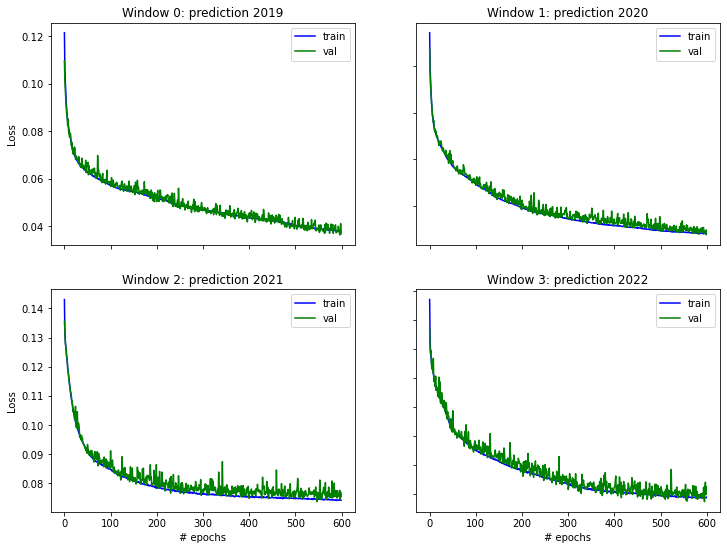

In [14]:
# plot loss curves

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

axs[0, 0].plot(dict_train_history[0][0], dict_train_history[0][1], 'b')
axs[0, 0].plot(dict_val_history[0][0], dict_val_history[0][1], 'g')
axs[0, 0].set_title('Window 0: prediction 2019')
axs[0, 0].legend(['train','val'], loc='upper right')

axs[0, 1].plot(dict_train_history[1][0], dict_train_history[1][1], 'b')
axs[0, 1].plot(dict_val_history[1][0], dict_val_history[1][1], 'g')
axs[0, 1].set_title('Window 1: prediction 2020')
axs[0, 1].legend(['train','val'], loc='upper right')

axs[1, 0].plot(dict_train_history[2][0], dict_train_history[2][1], 'b')
axs[1, 0].plot(dict_val_history[2][0], dict_val_history[2][1], 'g')
axs[1, 0].set_title('Window 2: prediction 2021')
axs[1, 0].legend(['train','val'], loc='upper right')

axs[1, 1].plot(dict_train_history[3][0], dict_train_history[3][1], 'b')
axs[1, 1].plot(dict_val_history[3][0], dict_val_history[3][1], 'g')
axs[1, 1].set_title('Window 3: prediction 2022')
axs[1, 1].legend(['train','val'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='# epochs', ylabel='Loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


## Build dataframe with predicted weights 

In [15]:
# monta o dataframe com as predições de pesos em cada janela
pred_list_df = []

for w in dic_pred_prep.keys():
    
    # build dataframe with weights
    predict_df = pd.DataFrame(dic_pred_prep[w][1], columns=['w_F1', 'w_F2', 'w_F3', 'w_F4'])
    
    # build dataframe with portfolios
    port_df = pd.DataFrame(pred_port_list, columns=['F1', 'F2', 'F3', 'F4'])
    
    # concatenate dataframes
    pred_port_df = pd.concat([port_df, predict_df], axis=1, ignore_index=False)
    
    # add window column
    pred_port_df['window'] = w
    
    pred_list_df.append(pred_port_df)

prediction_df = pd.concat(pred_list_df, ignore_index=True)


In [16]:
prediction_df

,F1,F2,F3,F4,w_F1,w_F2,w_F3,w_F4,window
0,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,Atlas One FIC FIA,9.991860e-01,3.609063e-04,0.000033,0.000420,0
1,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,Atmos Ações FIC FIA,9.992449e-01,4.459676e-04,0.000030,0.000279,0
2,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,AZ Quest Small Mid Caps FIC FIA,3.882942e-01,3.490503e-05,0.000077,0.611594,0
3,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,Bahia AM Smid Caps Valor FIC FIA,9.999017e-01,5.857128e-05,0.000003,0.000037,0
4,Alaska Black FIC FIA BDR Nível I,Apex Ações 30 FIC FIA,ARX Income FIC FIA,BNP Paribas Small Caps FIA,9.992549e-01,4.693182e-04,0.000102,0.000174,0
...,...,...,...,...,...,...,...,...,...
143835,Squadra Long Only FIC FIA,Tempo Capital Manacá FIC FIA,Velt FIC FIA,VOKIN GBV,7.703106e-07,6.049842e-09,0.810736,0.189263,3
143836,Squadra Long Only FIC FIA,Tempo Capital Manacá FIC FIA,Velt FIC FIA,XP Investor FIA,6.892502e-11,3.121165e-13,0.999993,0.000007,3
143837,Squadra Long Only FIC FIA,Tempo Capital Manacá FIC FIA,VOKIN GBV,XP Investor FIA,3.212989e-05,2.318169e-06,0.000160,0.999806,3
143838,Squadra Long Only FIC FIA,Velt FIC FIA,VOKIN GBV,XP Investor FIA,5.235630e-08,9.869703e-10,0.993929,0.006071,3


## Download predicted weights

In [17]:
prediction_df.to_csv(r'./predicted_weights/FIA1_3x20layers_relu_20142022_pred_weights_output.csv',
                    encoding = 'utf-8-sig',
                    index = False)
